In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
scaler_dl = StandardScaler()
X_train_scaled = scaler_dl.fit_transform(X_train_clf)
X_test_scaled = scaler_dl.transform(X_test_clf)

In [ ]:
# Deep Learning Model (MLP)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print("Training Deep Learning Model...")
history = model.fit(X_train_scaled, y_train_clf,
                    validation_data=(X_test_scaled, y_test_clf),
                    epochs=50, batch_size=32, verbose=0) # verbose=0 hides the epoch-by-epoch log
print("Training Complete.")

Training Deep Learning Model...
Training Complete.


In [ ]:
y_pred_probs = model.predict(X_test_scaled)
y_pred_dl = (y_pred_probs > 0.5).astype(int).flatten()

accuracy_dl = accuracy_score(y_test_clf, y_pred_dl)
precision_dl = precision_score(y_test_clf, y_pred_dl)
recall_dl = recall_score(y_test_clf, y_pred_dl)
f1_dl = f1_score(y_test_clf, y_pred_dl)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
print("\n-------------------------------------------")
print("DEEP LEARNING MODEL PERFORMANCE (ANN)")
print("-------------------------------------------")
print(f"Accuracy:  {accuracy_dl:.4f}")
print(f"Precision: {precision_dl:.4f}")
print(f"Recall:    {recall_dl:.4f}")
print(f"F1 Score:  {f1_dl:.4f}")
print("-------------------------------------------\n")


-------------------------------------------
DEEP LEARNING MODEL PERFORMANCE (ANN)
-------------------------------------------
Accuracy:  0.8076
Precision: 0.5959
Recall:    0.5839
F1 Score:  0.5898
-------------------------------------------



In [ ]:
comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'XGBoost': [accuracy_xgb_clf, precision_xgb_clf, recall_xgb_clf, f1_xgb_clf],
    'Deep Learning': [accuracy_dl, precision_dl, recall_dl, f1_dl]
}

results_df = pd.DataFrame(comparison_data)
print(">>> MODEL COMPARISON TABLE <<<")
print(results_df)

>>> MODEL COMPARISON TABLE <<<
      Metric   XGBoost  Deep Learning
0   Accuracy  0.880763       0.807631
1  Precision  0.768116       0.595890
2     Recall  0.711409       0.583893
3   F1 Score  0.738676       0.589831


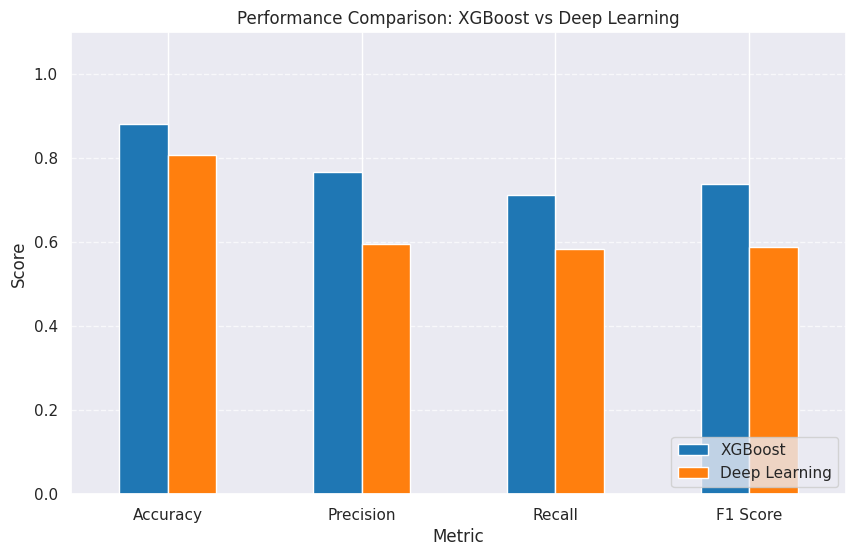

In [ ]:
results_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title("Performance Comparison: XGBoost vs Deep Learning")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

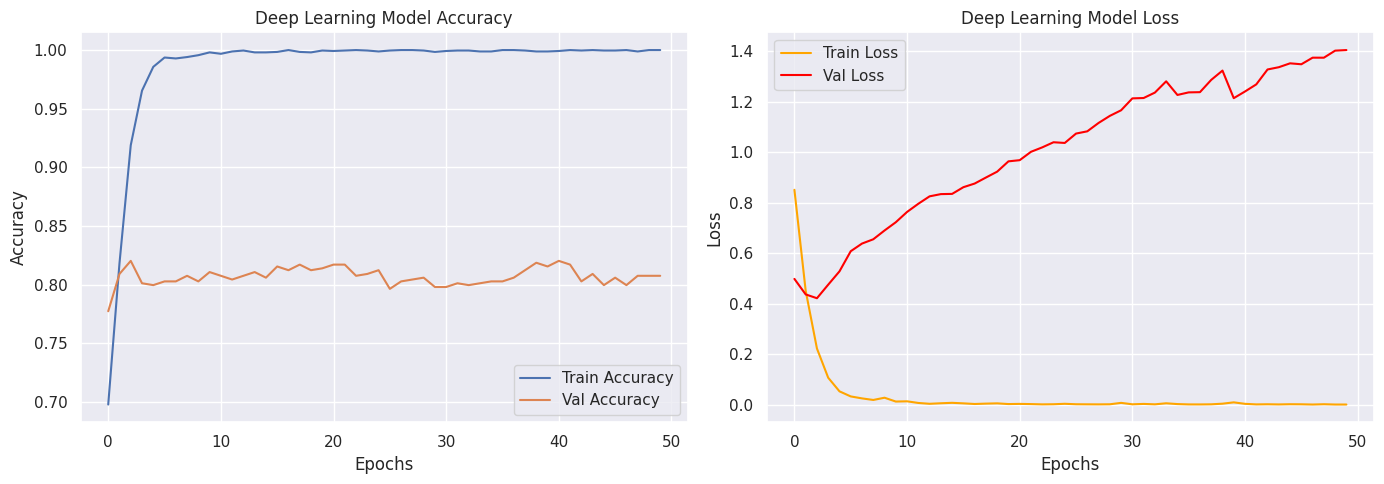

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Deep Learning Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.plot(history.history['val_loss'], label='Val Loss', color='red')
plt.title('Deep Learning Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Improved Deep Learning Model (MLP)
improved_model = Sequential()
improved_model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
improved_model.add(Dropout(0.4))

improved_model.add(Dense(64, activation='relu'))
improved_model.add(Dropout(0.3))

improved_model.add(Dense(32, activation='relu'))
improved_model.add(Dropout(0.2))

improved_model.add(Dense(1, activation='sigmoid'))

improved_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Instantiate EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("Training Improved Deep Learning Model...")
improved_history = improved_model.fit(X_train_scaled, y_train_clf,
                                        validation_data=(X_test_scaled, y_test_clf),
                                        epochs=50, batch_size=32, verbose=0,
                                        callbacks=[early_stopping])
print("Training Complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Improved Deep Learning Model...
Training Complete.


In [ ]:
y_pred_probs_improved = improved_model.predict(X_test_scaled)
y_pred_dl_improved = (y_pred_probs_improved > 0.5).astype(int).flatten()

accuracy_dl_improved = accuracy_score(y_test_clf, y_pred_dl_improved)
precision_dl_improved = precision_score(y_test_clf, y_pred_dl_improved)
recall_dl_improved = recall_score(y_test_clf, y_pred_dl_improved)
f1_dl_improved = f1_score(y_test_clf, y_pred_dl_improved)

print("\n-------------------------------------------------")
print("IMPROVED DEEP LEARNING MODEL PERFORMANCE (ANN)")
print("-------------------------------------------------")
print(f"Accuracy:  {accuracy_dl_improved:.4f}")
print(f"Precision: {precision_dl_improved:.4f}")
print(f"Recall:    {recall_dl_improved:.4f}")
print(f"F1 Score:  {f1_dl_improved:.4f}")
print("-------------------------------------------------\n")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

-------------------------------------------------
IMPROVED DEEP LEARNING MODEL PERFORMANCE (ANN)
-------------------------------------------------
Accuracy:  0.8203
Precision: 0.6552
Recall:    0.5101
F1 Score:  0.5736
-------------------------------------------------



In [ ]:
comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'XGBoost': [accuracy_xgb_clf, precision_xgb_clf, recall_xgb_clf, f1_xgb_clf],
    'Deep Learning': [accuracy_dl, precision_dl, recall_dl, f1_dl],
    'Improved Deep Learning': [accuracy_dl_improved, precision_dl_improved, recall_dl_improved, f1_dl_improved]
}

results_df = pd.DataFrame(comparison_data)
print(">>> MODEL COMPARISON TABLE <<<")
print(results_df)

>>> MODEL COMPARISON TABLE <<<
      Metric   XGBoost  Deep Learning  Improved Deep Learning
0   Accuracy  0.880763       0.807631                0.820350
1  Precision  0.768116       0.595890                0.655172
2     Recall  0.711409       0.583893                0.510067
3   F1 Score  0.738676       0.589831                0.573585


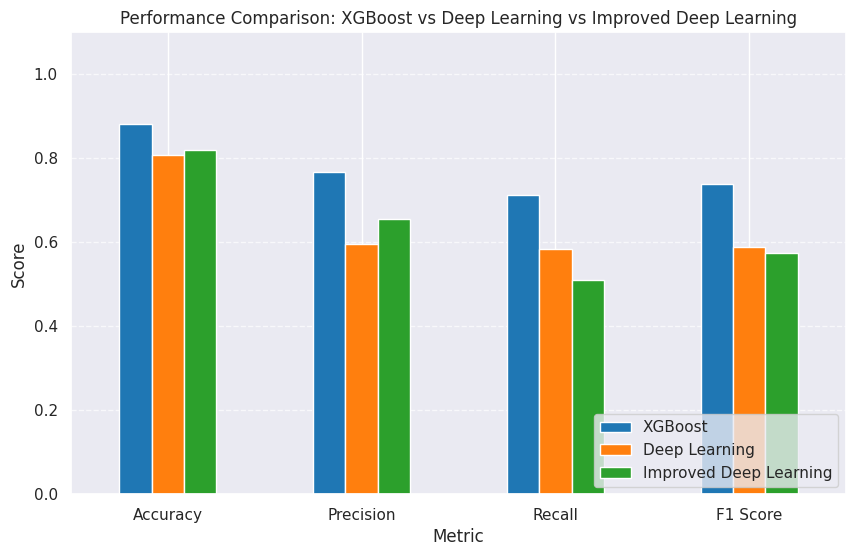

In [ ]:
results_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Performance Comparison: XGBoost vs Deep Learning vs Improved Deep Learning")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

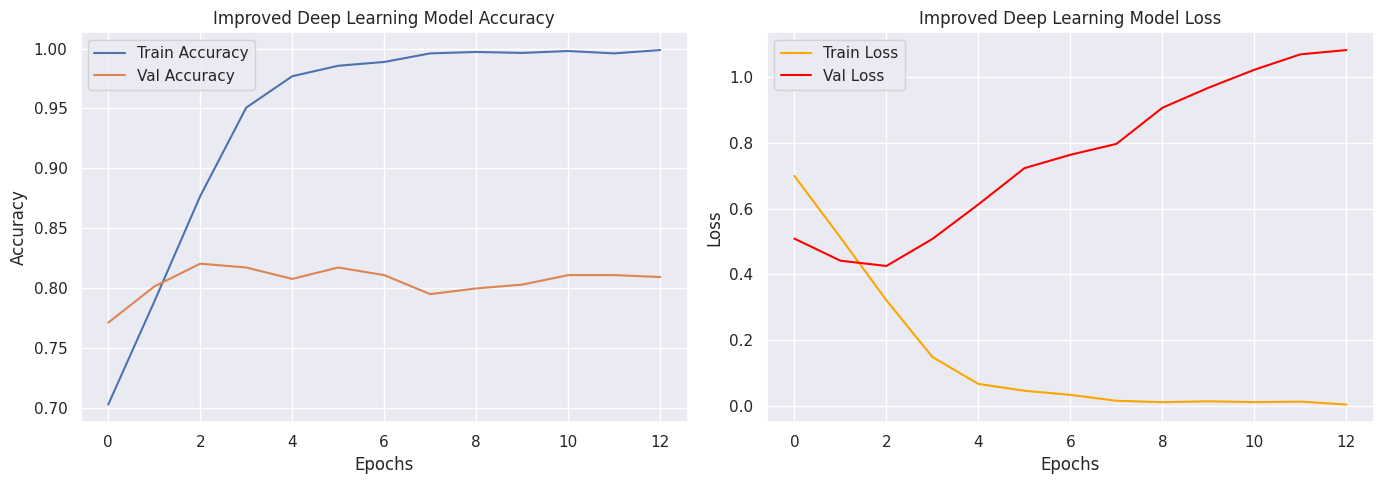

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(improved_history.history['accuracy'], label='Train Accuracy')
plt.plot(improved_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Improved Deep Learning Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(improved_history.history['loss'], label='Train Loss', color='orange')
plt.plot(improved_history.history['val_loss'], label='Val Loss', color='red')
plt.title('Improved Deep Learning Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("Final Model Comparison Table:")
display(results_df)

Final Model Comparison Table:


,Metric,XGBoost,Deep Learning,Improved Deep Learning
0,Accuracy,0.880763,0.807631,0.820350
1,Precision,0.768116,0.595890,0.655172
2,Recall,0.711409,0.583893,0.510067
3,F1 Score,0.738676,0.589831,0.573585


In [ ]:
#THE_END